In this example we are integrating the Wunderling Network with levy stable noise using the semi-implicit euler-maruyama algorithm for duffing systems.

In [1]:
import pycascades as pc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
duration = 100000.  #actual real simulation years
t_step = 15		    #Time step per integration step
#drive coupling strength
strength = 0.25
#drive global mean temperature (GMT) above pre-industrial
GMT = 2.5

#Tipping ranges from distribution
limits_gis, limits_thc, limits_wais, limits_amaz = 2.241961283016736, 4.690622821301434, 1.4159411909227195, 4.102480797163987 

#Probability fractions
# TO GIS
pf_wais_to_gis, pf_thc_to_gis = 0.19309698390040142, 0.5780331277664367
# TO THC
pf_gis_to_thc, pf_wais_to_thc = 0.31200890950255655, 0.11975402592062362
# TO WAIS
pf_thc_to_wais, pf_gis_to_wais = 0.1316699858272922, 0.27059650762351767
# TO AMAZ
pf_thc_to_amaz =  0.3715199043381331

#include uncertain "+-" links:
#plus_minus_links = np.array(list(itertools.product([-1.0, 0.0, 1.0], repeat=2)))
kk = [1.0, 1.0]

gis_time, thc_time, wais_time, amaz_time = 98.0, 6.0, 48.0, 1.0

conv_fac_gis = 19.035040012437637

In [3]:
earth_system = pc.earth_system.Earth_System(gis_time, thc_time, wais_time, amaz_time,
                    limits_gis, limits_thc, limits_wais, limits_amaz,
                    pf_wais_to_gis, pf_thc_to_gis, pf_gis_to_thc,
                    pf_wais_to_thc, pf_gis_to_wais, pf_thc_to_wais, pf_thc_to_amaz)
net = earth_system.earth_network(GMT, strength, kk[0], kk[1])

In [6]:
# initialize state
initial_state = [-1, -1, -1, -1]
ev = pc.evolve_sde(net, initial_state)

# Timestep to integration
timestep = t_step / conv_fac_gis
sim_length = duration
t_end = sim_length/conv_fac_gis
# define alphas for symmetric alpha-stable levy noise.
alphas = [1.5, 1.5, 1.5, 1.5]
#define sigmas for random processes
sigmas = [0.1, 0.0, 0.0, 0.0]
ev.integrate(timestep, t_end, sigmas=sigmas, alphas = alphas, seed = 42)

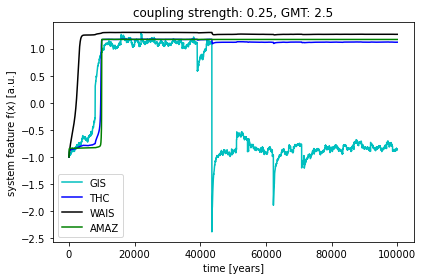

In [7]:
#save and plot the temporal evolution
fig = plt.figure()
# in case integration time should look the same for all runs divide t_arr_saving_structure by timer
plt.plot(ev.get_timeseries()[0]*conv_fac_gis, ev.get_timeseries()[1][:, 0], color="c", label="GIS")
plt.plot(ev.get_timeseries()[0]*conv_fac_gis, ev.get_timeseries()[1][:, 1], color="b", label="THC")
plt.plot(ev.get_timeseries()[0]*conv_fac_gis, ev.get_timeseries()[1][:, 2], color="k", label="WAIS")
plt.plot(ev.get_timeseries()[0]*conv_fac_gis, ev.get_timeseries()[1][:, 3], color="g", label="AMAZ")

plt.title("coupling strength: {}, GMT: {}".format(np.round(strength, 2), np.round(GMT, 2)))
plt.xlabel("time [years]")
plt.ylabel("system feature f(x) [a.u.]")
plt.legend(loc='best')
plt.tight_layout()